<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISE-291-Term-Project" data-toc-modified-id="ISE-291-Term-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ISE 291 Term Project</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li><li><span><a href="#Task-9" data-toc-modified-id="Task-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Task-9</a></span></li><li><span><a href="#Task-10" data-toc-modified-id="Task-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Task-10</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# ISE 291 Project 

## Task-1 

### In this task the aim is to perform some data cleaning skills

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r'Group_19_03_A.csv')
display(df.shape)
display(df.head())
display(df.info())
df.isna().sum()

# The incosistent numeric features in are the following ('Model_Price' [',' and 'SAR'] ,
#'Sale_Price' [',' and 'SAR'] ,'KPL' ['mpl'], 'Owner_History' [negative values])

# The incosistent non-numeric features in are the following ('class' [captilized])



# Fixing the inconsistencies in the df of the numeric columns.#
toInt = ['Sale_Price','Model_Price','KPL','Owner_History',]

for feature in toInt:
    df[feature] = df[feature].apply(lambda x: str(x).replace(',',''))
    df[feature] = df[feature].apply(lambda x: str(x).replace('SAR',''))   
    df[feature] = df[feature].apply(lambda x: str(x).replace('mpl',''))     
    df[feature] = df[feature].apply(lambda x: abs(float(x)))
    
    
## Double checking the consistencies.
# numericColumns = df.select_dtypes(exclude='object').columns

# for i in numericColumns:
#     print(i,df[i].min())
    

# nonNumericColumns = df.select_dtypes(include='object').columns
# for i in nonNumericColumns:
#     print(i,':',df[i].unique())   

## Above invistigations show that column 'Color' is inconsistent. [Remove string 'color']


# Fixing the incosistency in the color column.
df['Color'] = df['Color'].apply(lambda x: x.replace('Color','').strip())

# Fixing the incosistency in the class column.
df['Class'] = df['Class'].str.lower()
df['Class'].unique()

numericColumns = df.select_dtypes(exclude='object').columns
nonNumericColumns = df.select_dtypes(include='object').columns


# Now we want to fix null records of "Model Price" Feature. 

meanTable = df.groupby(['Cylinders','Model_Year','Manufacturer','Type','Power','Class'])['Model_Price'].mean()

print()
print(meanTable,'\n')
print('The number of unique records with null "Model Price" value in the meanTable',meanTable.isna().sum(),'\n')

# From here we can see that with the specifications used above('Manufacturer','Type',...) there are 408 unique records
# To fill these null records we can approximate their values based on records with similar features.


# This FUNCTION will replace each null value in the df by the equivalent value in the meanTable. 
def remove_NanValues_ModelPrice(row):
    if pd.isnull(row['Model_Price']):
        return meanTable[row['Cylinders'],row['Model_Year'],row['Manufacturer'],row['Type'],row['Power'],row['Class']]
    else:
        return row['Model_Price']

df['Model_Price'] = df.apply(remove_NanValues_ModelPrice, axis=1)


# The code below will replace each null value in the df by the equivalent value in the meanTable. 


# The following meanTable has less specifications than previous meanTable. 
# Removed: ['class']
meanTable = df.groupby(['Cylinders','Model_Year','Manufacturer','Type','Power'])['Model_Price'].mean()

print('The number of unique values in the meanTable',meanTable.isna().sum(),'\n')

def remove_NanValues_ModelPrice(row):
    if pd.isnull(row['Model_Price']):
        return meanTable[row['Cylinders'],row['Model_Year'],row['Manufacturer'],row['Type'],row['Power']]
    else:
        return row['Model_Price']

df['Model_Price'] = df.apply(remove_NanValues_ModelPrice, axis=1)



# The following meanTable has less specifications than previous meanTable. 
# Removed: ['power']
meanTable = df.groupby(['Model_Year','Manufacturer','Type'])['Model_Price'].mean()
print('The number of unique values in the meanTable',meanTable.isna().sum(),'\n')

def remove_NanValues_ModelPrice(row):
    if pd.isnull(row['Model_Price']):
        return meanTable[row['Model_Year'],row['Manufacturer'],row['Type']]
    else:
        return row['Model_Price']

df['Model_Price'] = df.apply(remove_NanValues_ModelPrice, axis=1)



# The following meanTable has less specifications than previous meanTable. 
# Removed: ['Model_Year']
meanTable = df.groupby(['Manufacturer','Type'])['Model_Price'].mean()
print('The number of unique values in the meanTable',meanTable.isna().sum(),'\n')

def remove_NanValues_ModelPrice(row):
    if pd.isnull(row['Model_Price']):
        return meanTable[row['Manufacturer'],row['Type']]
    else:
        return row['Model_Price']

df['Model_Price'] = df.apply(remove_NanValues_ModelPrice, axis=1)

print('Filled all the null values',df.isna().sum(),'\n')
print('Number of row and columns respec.',df.shape,'\n')


# Summary
# The method we used to deal with missing values is as the following:
# We used 'groupby' method to group all the data by the mean of 'Model Price' and intialize it to 'meanTable'.
# Then we check if there are null records in the 'meanTable'.
# Then we built a function that replaces null records in the df, with the same features of a record in the 'meanTable', 

# Then we built 'remove_NanValues_ModelPrice' function which fills all null records in the df with values of similar
# records in 'meanTable'.
# Then we check again whether we still have null values or not.
# If there are null values we reduce the specifcaiton of the 'meanTable', and we apply the function on the new 'meanTable'
# We keep reducing the features of 'meanTable' until we have ZERO null values!


# Outliers
for c in df.select_dtypes(exclude='object').columns:
    Q1, Q3 = df[c].quantile(0.25), df[c].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    index_row = df[(df[c] < lower_bound) | (df[c] > upper_bound)].index
    df.drop(index_row, inplace=True)

print('Number of rows and columns after removing the outliers',df.shape)

(3000, 17)

,Manufacturer,Type,Cylinders,Model_Year,Model_Price,Sold_Year,Sale_Price,KM_Driven,KPL,Power,Class,Location,Accident_History,Owner_History,Color,Seller_Type,Service_History
0,Huendae,sedan,8,1998,"47,803 SAR",2004,"22,586 SAR",46732,11.76,2WD,standard,Dammam,6,-5,Color Black,individual,0
1,Honta,sedan,6,2004,NaN,2006,"35,280 SAR",64794,12.83,2WD,standard,Madinah,7,-3,Black,company,0
2,BeEmW,sedan,4,2000,"83,554 SAR",2006,"33,933 SAR",229000,8.54,4WD,STANDARD,Dhahran,7,-5,White Color,individual,0
3,Fourd,suv,4,1999,NaN,2005,"85,796 SAR",49779,6550.0mpl,4WD,premium,Riyadh,2,1,Gray,individual,1
4,Huendae,crossover,4,2003,"63,334 SAR",2008,"34,234 SAR",53385,19200.0mpl,2WD,STANDARD,Dammam,10,2,White Color,individual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Manufacturer      3000 non-null   object
 1   Type              3000 non-null   object
 2   Cylinders         3000 non-null   int64 
 3   Model_Year        3000 non-null   int64 
 4   Model_Price       2095 non-null   object
 5   Sold_Year         3000 non-null   int64 
 6   Sale_Price        3000 non-null   object
 7   KM_Driven         3000 non-null   int64 
 8   KPL               3000 non-null   object
 9   Power             3000 non-null   object
 10  Class             3000 non-null   object
 11  Location          3000 non-null   object
 12  Accident_History  3000 non-null   int64 
 13  Owner_History     3000 non-null   int64 
 14  Color             3000 non-null   object
 15  Seller_Type       3000 non-null   object
 16  Service_History   3000 non-null   int64 
dtypes: int64(7), o

None


Cylinders  Model_Year  Manufacturer   Type   Power  Class   
4          1990        BeEmW          sedan  2WD    standard         NaN
                       Fourd          sedan  2WD    standard     57120.0
                       Geep           suv    2WD    standard     85680.0
                       Huendae        suv    4WD    standard     73440.0
                       Masda          suv    2WD    standard         NaN
                                                                  ...   
8          2009        JournalMotors  suv    2WD    standard    124819.0
                       Masda          sedan  2WD    standard     59437.0
                       Shevy          sedan  2WD    premium     116498.0
                       Toyoda         sedan  2WD    standard     71325.0
                                      suv    2WD    standard    106988.0
Name: Model_Price, Length: 1824, dtype: float64 

The number of unique records with null "Model Price" value in the meanTable 408 

The

## Task-2

### In this this task the aim is to perform some visualizations + Exploratory Analysis.

,Manufacturer,Type,Cylinders,Model_Year,Model_Price,Sold_Year,Sale_Price,KM_Driven,KPL,Power,Class,Location,Accident_History,Owner_History,Color,Seller_Type,Service_History
0,Honta,suv,4,2004,"80,752 SAR",2010,"42,394 SAR",61537,11.53,2WD,standard,Dammam,3,1,Silver,company,0
1,Nesshan,suv,4,1999,"73,139 SAR",2000,"58,057 SAR",9066,13.22,2WD,standard,Dhahran,5,1,Silver,company,1
2,Wolksvagon,crossover,4,2005,"79,072 SAR",2005,"58,924 SAR",702,11.96,2WD,standard,Madinah,5,1,Blue,individual,0
3,Toyoda,suv,4,2000,"89,522 SAR",2005,"50,589 SAR",44064,6.52,2WD,standard,Dhahran,12,2,Red,individual,1
4,JournalMotors,sedan,4,1994,"86,559 SAR",1997,"48,845 SAR",56116,3.80,2WD,premium,Dhahran,11,2,Silver,company,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      5000 non-null   object 
 1   Type              5000 non-null   object 
 2   Cylinders         5000 non-null   int64  
 3   Model_Year        5000 non-null   int64  
 4   Model_Price       5000 non-null   object 
 5   Sold_Year         5000 non-null   int64  
 6   Sale_Price        5000 non-null   object 
 7   KM_Driven         5000 non-null   int64  
 8   KPL               5000 non-null   float64
 9   Power             5000 non-null   object 
 10  Class             5000 non-null   object 
 11  Location          5000 non-null   object 
 12  Accident_History  5000 non-null   int64  
 13  Owner_History     5000 non-null   int64  
 14  Color             5000 non-null   object 
 15  Seller_Type       5000 non-null   object 
 16  Service_History   5000 non-null   int64  


None

Manufacturer        0
Type                0
Cylinders           0
Model_Year          0
Model_Price         0
Sold_Year           0
Sale_Price          0
KM_Driven           0
KPL                 0
Power               0
Class               0
Location            0
Accident_History    0
Owner_History       0
Color               0
Seller_Type         0
Service_History     0
dtype: int64

pairplotting the numerical features with respect to "Sale_Price" column



<Figure size 432x288 with 0 Axes>

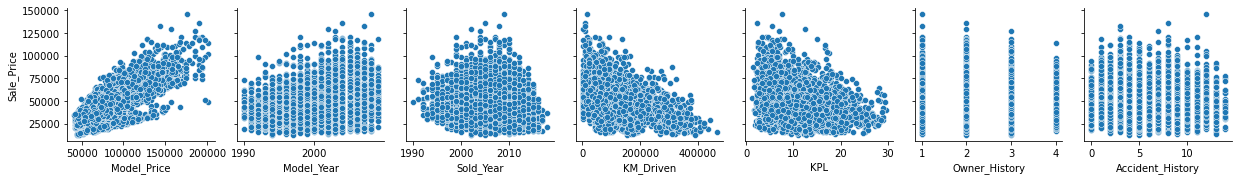

differentiate the pairplot above with each categorical feature.



<Figure size 432x288 with 0 Axes>

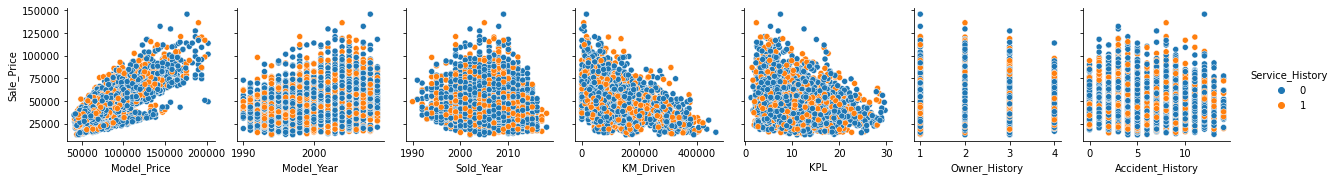

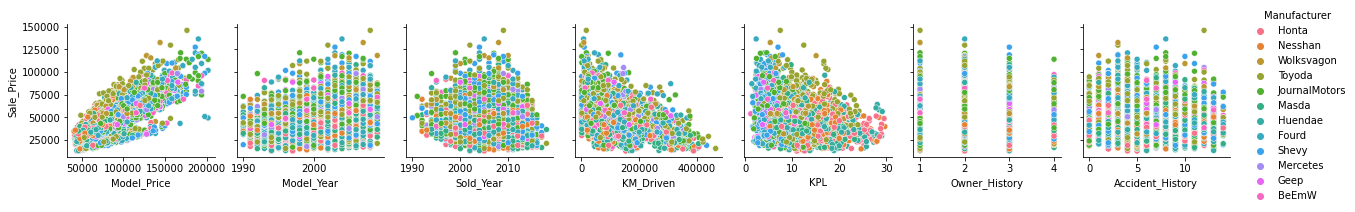

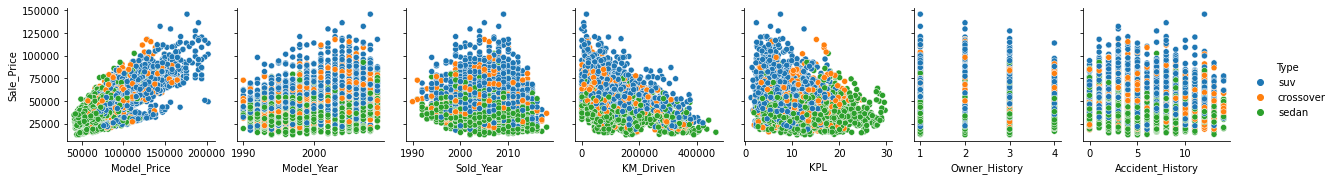

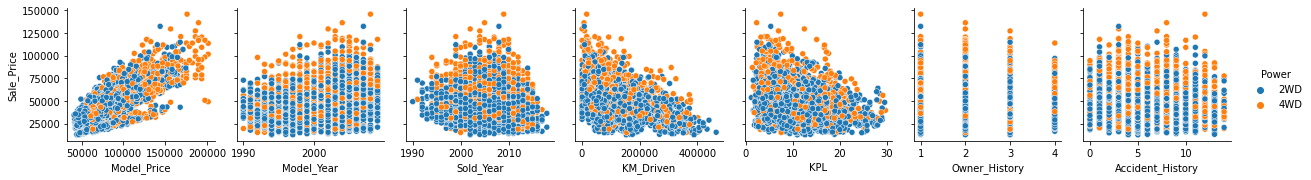

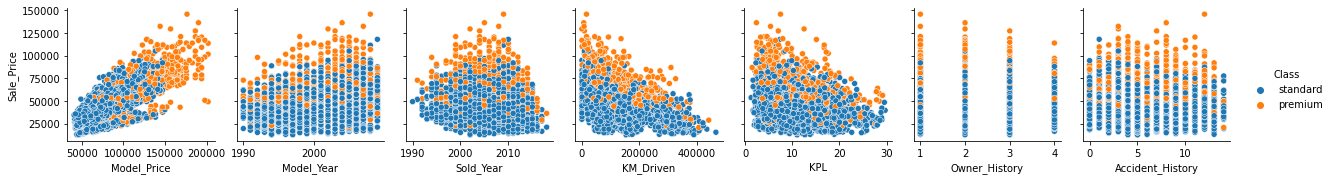

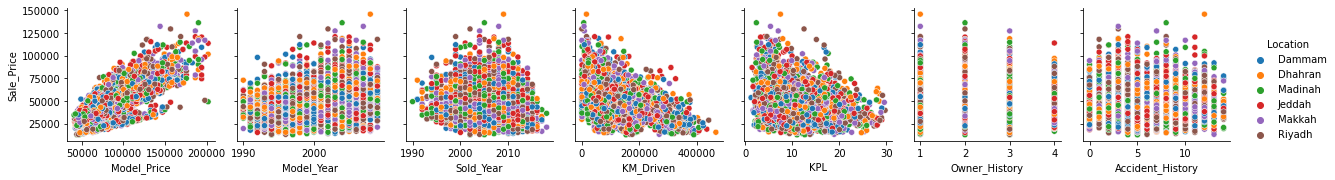

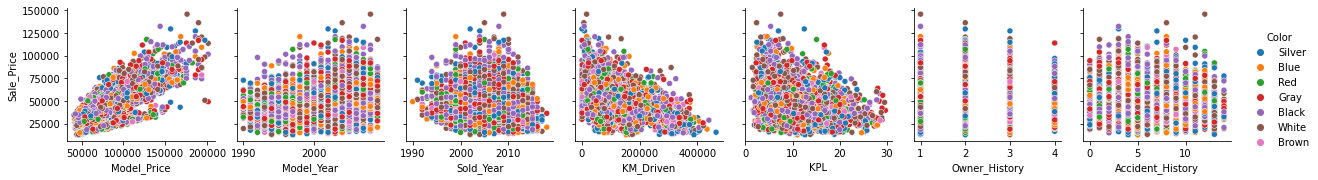

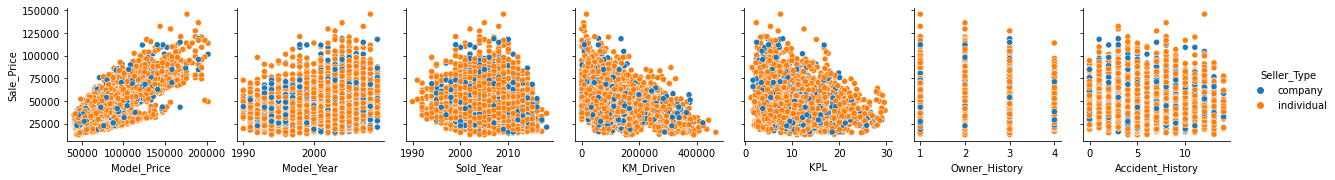

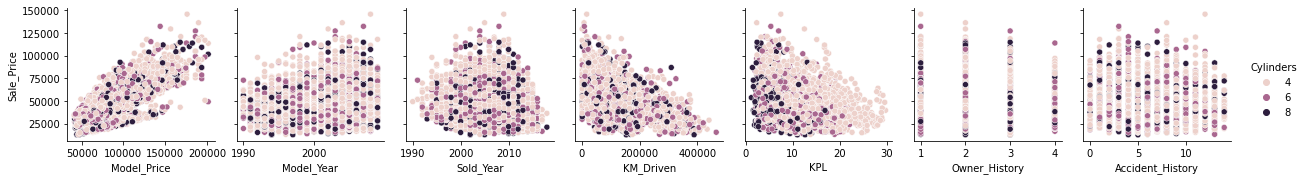

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r'Group_19_03_B.csv')
display(df.head())
display(df.info())
display(df.isna().sum())

#Fixing inconsistencies
toInt = ['Sale_Price','Model_Price','KPL','Owner_History',]

for feature in toInt:
    df[feature] = df[feature].apply(lambda x: str(x).replace(',',''))
    df[feature] = df[feature].apply(lambda x: str(x).replace('SAR',''))   
    df[feature] = df[feature].apply(lambda x: str(x).replace('mpl',''))     
    df[feature] = df[feature].apply(lambda x: abs(float(x)))
    
    
# Here we are pairplotting the numerical features with respect to 'Sale_Price' column  
x_axis = ['Model_Price','Model_Year','Sold_Year','KM_Driven', 'KPL','Owner_History','Accident_History']

print('pairplotting the numerical features with respect to "Sale_Price" column\n')
plt.figure()
sns.pairplot(y_vars='Sale_Price',x_vars=x_axis,data=df)
plt.show()


# Here We deff. the pairplot above with each categorical feature.
print('differentiate the pairplot above with each categorical feature.\n')
plt.figure()

categoricalFeatures = ['Service_History', 'Manufacturer', 'Type', 'Power', 'Class', 'Location',
                      'Color', 'Seller_Type', 'Cylinders']

for i in categoricalFeatures:
    sns.pairplot(y_vars = 'Sale_Price',x_vars = x_axis,hue = i ,data=df)
    plt.show()



## Task-3

### In this task the aim is show the correlation between different features. 

,Cylinders,Model_Year,Model_Price,Sold_Year,Sale_Price,KM_Driven,KPL,Accident_History,Owner_History,Service_History
Cylinders,1.000000,0.010730,-0.011655,0.010991,-0.029767,0.018586,-0.291516,-0.002892,-0.013570,0.013908
Model_Year,0.010730,1.000000,0.279639,0.902216,0.224192,0.007072,0.006164,-0.007826,-0.002631,-0.010472
Model_Price,-0.011655,0.279639,1.000000,0.247522,0.744767,-0.021988,-0.522400,0.017298,-0.024197,-0.008084
Sold_Year,0.010991,0.902216,0.247522,1.000000,-0.040785,0.266120,0.009002,-0.001527,-0.000654,-0.003237
Sale_Price,-0.029767,0.224192,0.744767,-0.040785,1.000000,-0.385216,-0.268716,-0.085554,-0.042479,0.038804
KM_Driven,0.018586,0.007072,-0.021988,0.266120,-0.385216,1.000000,0.025908,0.001753,-0.007991,0.023012
KPL,-0.291516,0.006164,-0.522400,0.009002,-0.268716,0.025908,1.000000,-0.007471,0.007225,-0.022276
Accident_History,-0.002892,-0.007826,0.017298,-0.001527,-0.085554,0.001753,-0.007471,1.000000,-0.018092,0.004521
Owner_History,-0.013570,-0.002631,-0.024197,-0.000654,-0.042479,-0.007991,0.007225,-0.018092,1.000000,0.016970
Service_History,0.013908,-0.010472,-0.008084,-0.003237,0.038804,0.023012,-0.022276,0.004521,0.016970,1.000000



The highest three numeric features correlated to Sale_Price:

 Model_Price [0.74], KM_Driven [0.39] and KPL [0.27] 
---------------------------------------------------------------------------------------------
The least three numeric features correlated to Sale_Price:

 Cylinders [0.03], Service_History [0.039] and Sold_Year [0.041]



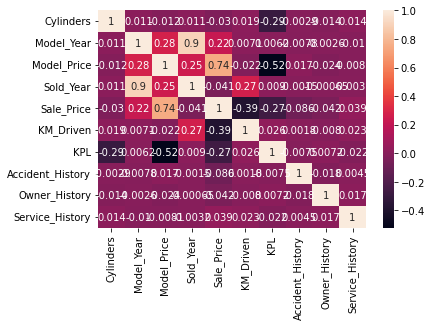

In [3]:
numericColumns = df.select_dtypes(exclude='object').columns
df = df.loc[:,numericColumns]
corr = df.corr(method = 'pearson')
display(corr)
sns.heatmap(df.corr(),annot=True)
print()
print('The highest three numeric features correlated to Sale_Price:\n\n','Model_Price [0.74], KM_Driven [0.39] and KPL [0.27] ')
print('---------------------------------------------------------------------------------------------')
print('The least three numeric features correlated to Sale_Price:\n\n', 'Cylinders [0.03], Service_History [0.039] and Sold_Year [0.041]\n')

## Task-4

### In this task the aim is show and apply PCA knowledge.

,Cylinders,Model_Year,Model_Price,Sold_Year,Sale_Price,KM_Driven,KPL,Accident_History,Owner_History,Service_History,depreciate
0,4,2004,80752.0,2010,42394.0,61537,11.53,3,1.0,0,0.079168
1,4,1999,73139.0,2000,58057.0,9066,13.22,5,1.0,1,0.206210
2,4,2005,79072.0,2005,58924.0,702,11.96,5,1.0,0,inf
3,4,2000,89522.0,2005,50589.0,44064,6.52,12,2.0,1,0.086980
4,4,1994,86559.0,1997,48845.0,56116,3.80,11,2.0,0,0.145234
...,...,...,...,...,...,...,...,...,...,...,...
4995,4,1993,72739.0,1996,43098.0,33243,12.73,5,1.0,1,0.135833
4996,4,2002,74511.0,2006,50050.0,49889,15.53,5,2.0,0,0.082072
4997,8,1994,52995.0,2000,27424.0,65287,9.48,4,1.0,0,0.080420
4998,4,1992,76406.0,2000,22537.0,313094,8.80,11,2.0,0,0.088130


The variance captured by pca 1 is:  87.16%
The variance captured by pca 2 is:  11.87%


<Figure size 432x288 with 0 Axes>

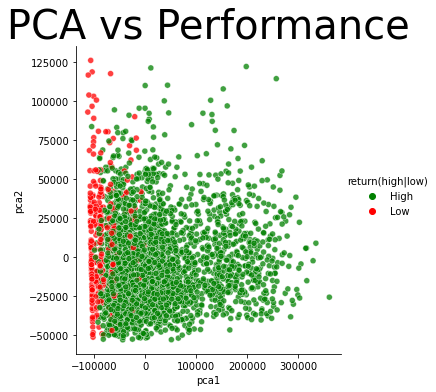

In [4]:
df['depreciate'] = (df['Model_Price']-df['Sale_Price'])/((df['Sold_Year']-df['Model_Year'])*(df['Model_Price']))

cat_columns = df.select_dtypes(include='object').columns

df = pd.get_dummies(df, columns=cat_columns)
display(df)

# function to categorize the perfomance
def categorize(x):
    if x <= 0.1: return "High"
    elif x>= 0.2: return "Low"
    else: return "Normal"

df["return(high|low)"] = df['depreciate'].apply(categorize)


num_columns = df.select_dtypes(exclude='object').columns
pca_input_columns=num_columns.drop(['depreciate'])

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model

principalComponents = pca.fit_transform(df[pca_input_columns]) # get two components

## # Same as above in two steps
# pca.fit(df[pca_input_columns])
# principalComponents = pca.transform(df[pca_input_columns])

df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]

for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')
    
pca_1_coefficients=np.round(pca.components_[0],4)

zipList=list(zip(pca_input_columns,pca_1_coefficients))
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff'])


pca_2_coefficients=np.round(pca.components_[1],4)


plt.figure()
sns.relplot(x='pca1', 
            y='pca2', 
            hue='return(high|low)', 
            palette=['g', 'r'], 
            alpha=0.75, 
            height=5, 
            aspect=1, 
            data=df[df["return(high|low)"] != "Normal"])
plt.title('PCA vs Performance', fontsize=40)
plt.show()


## Task-5

### In this task the aim is perform some visualization + Exploratory Analysis.

Low return cars patterns


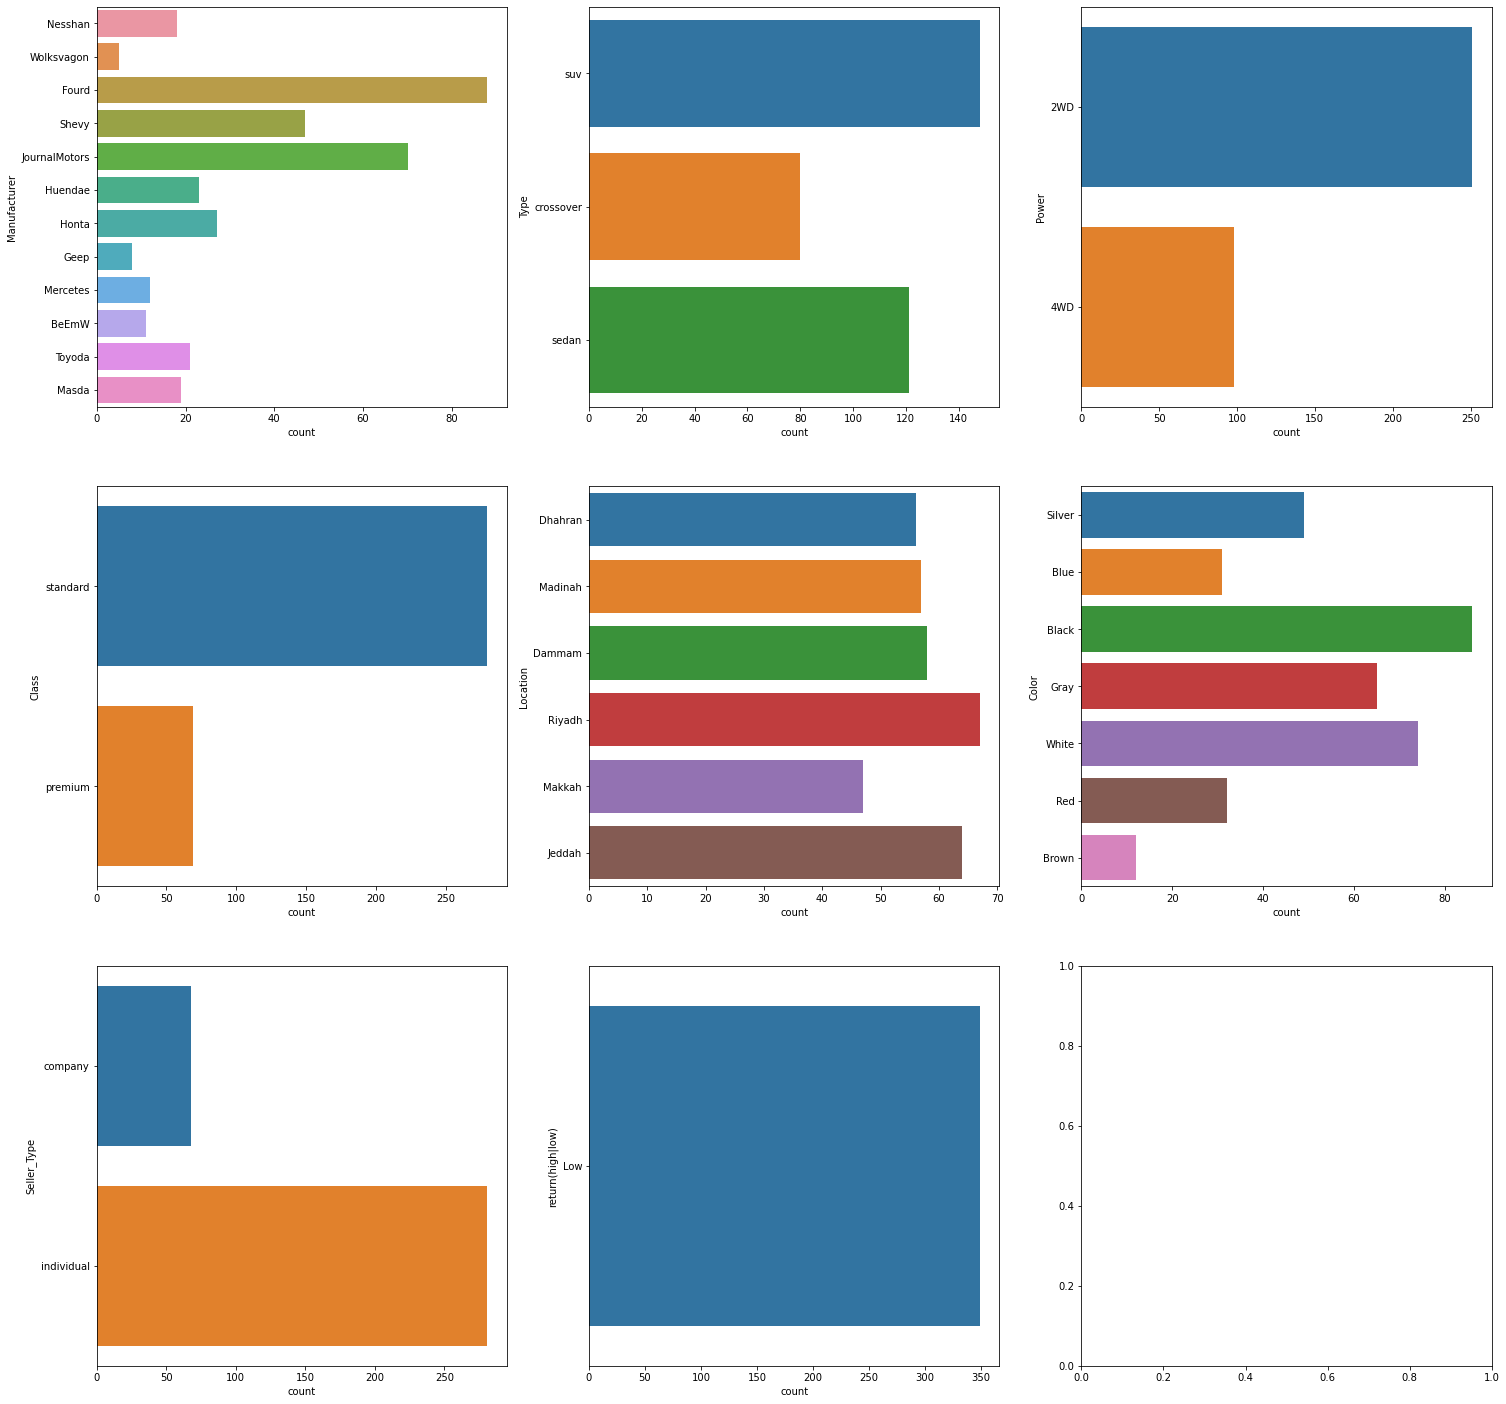

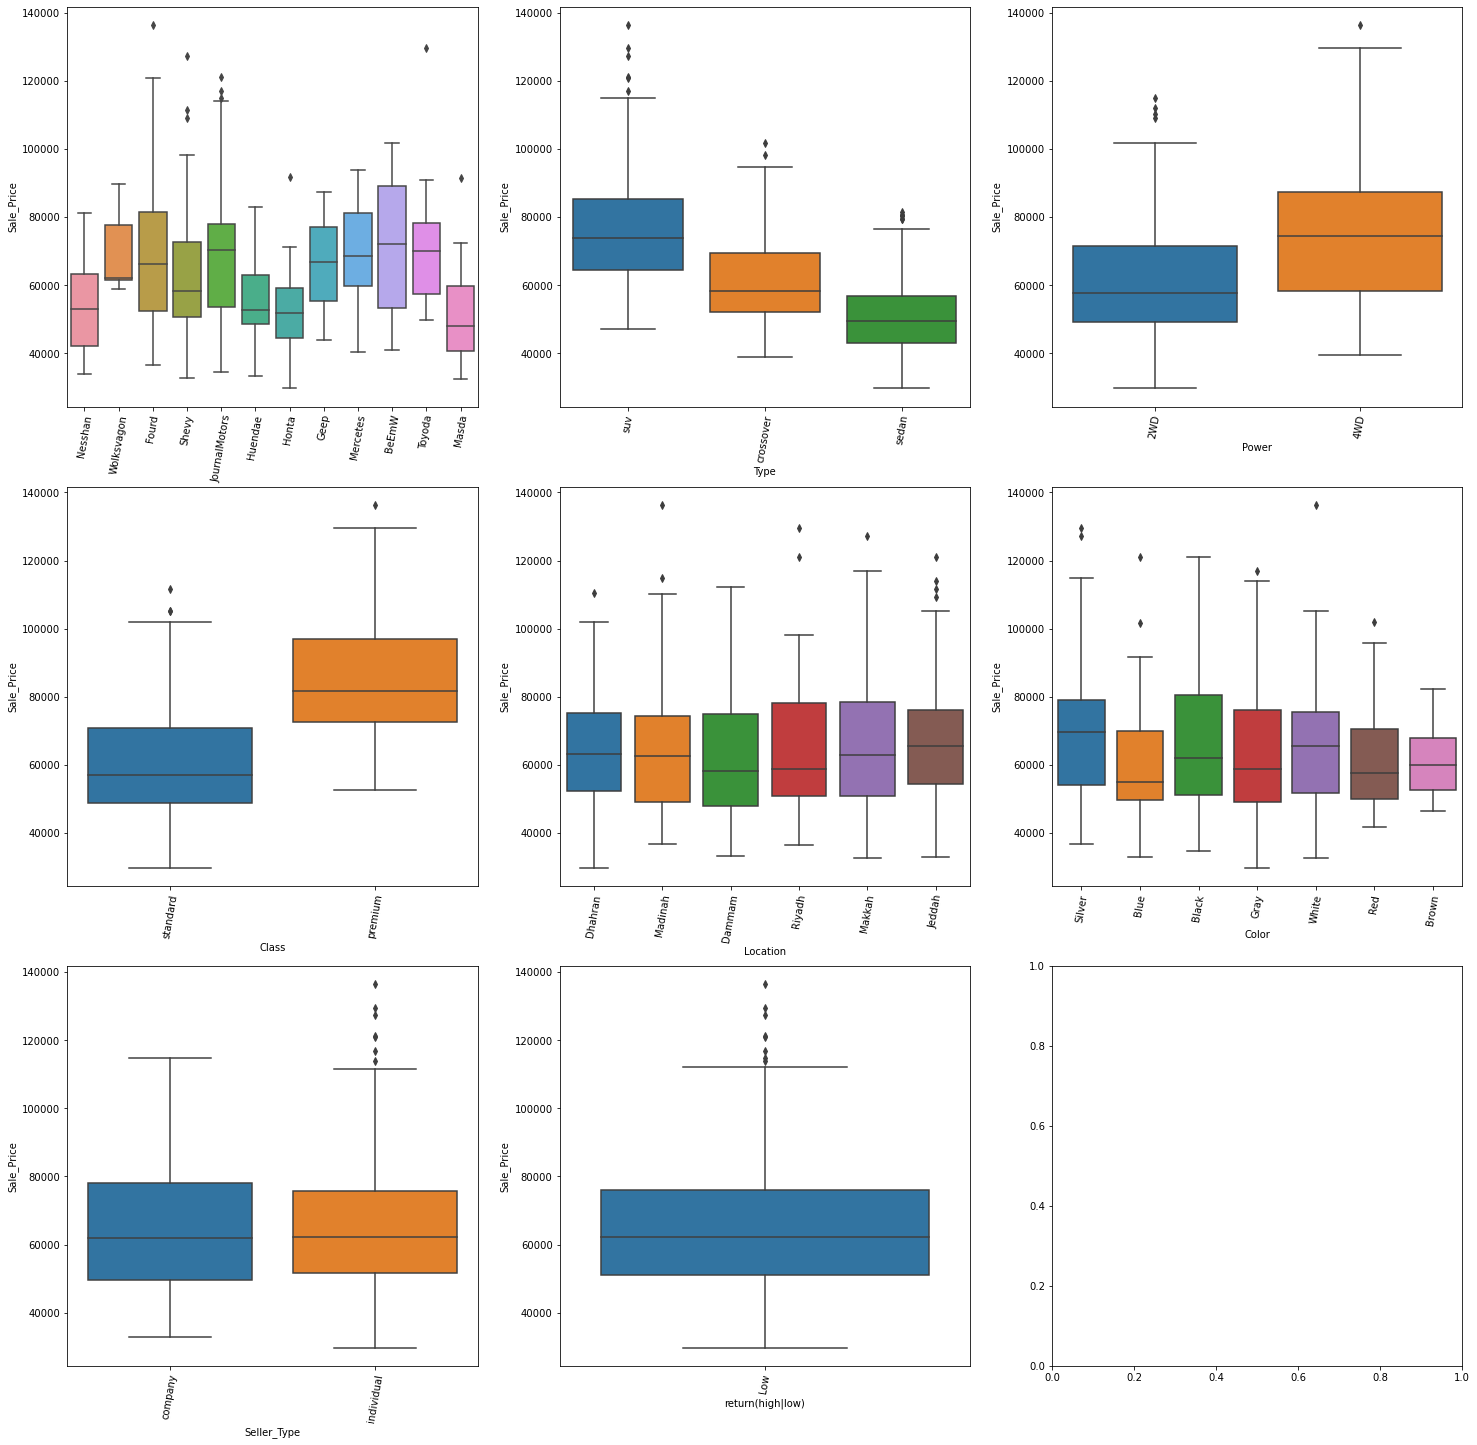

/Users/mohammedalsaif/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/mohammedalsaif/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


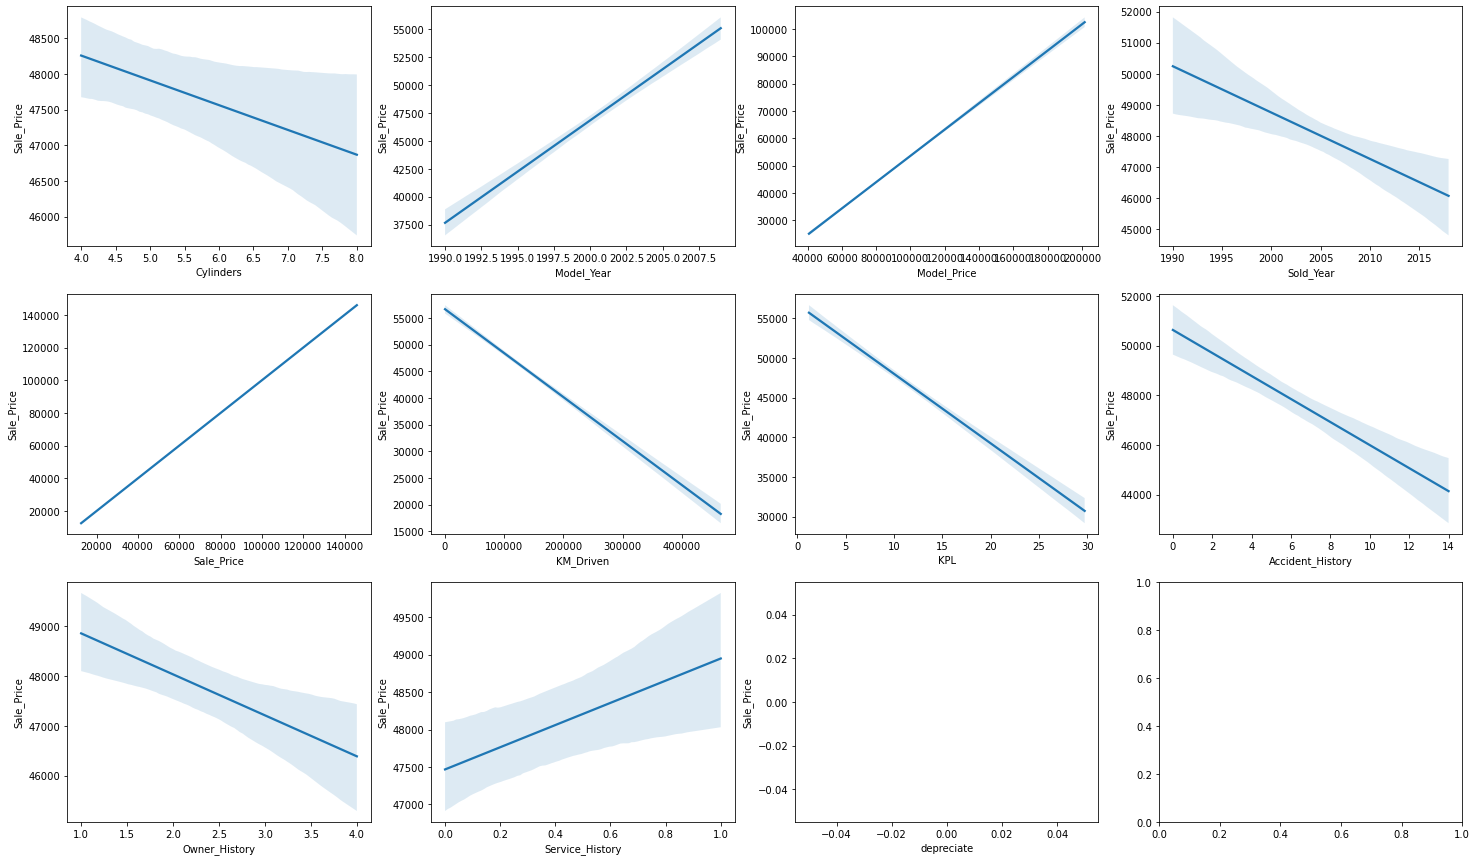

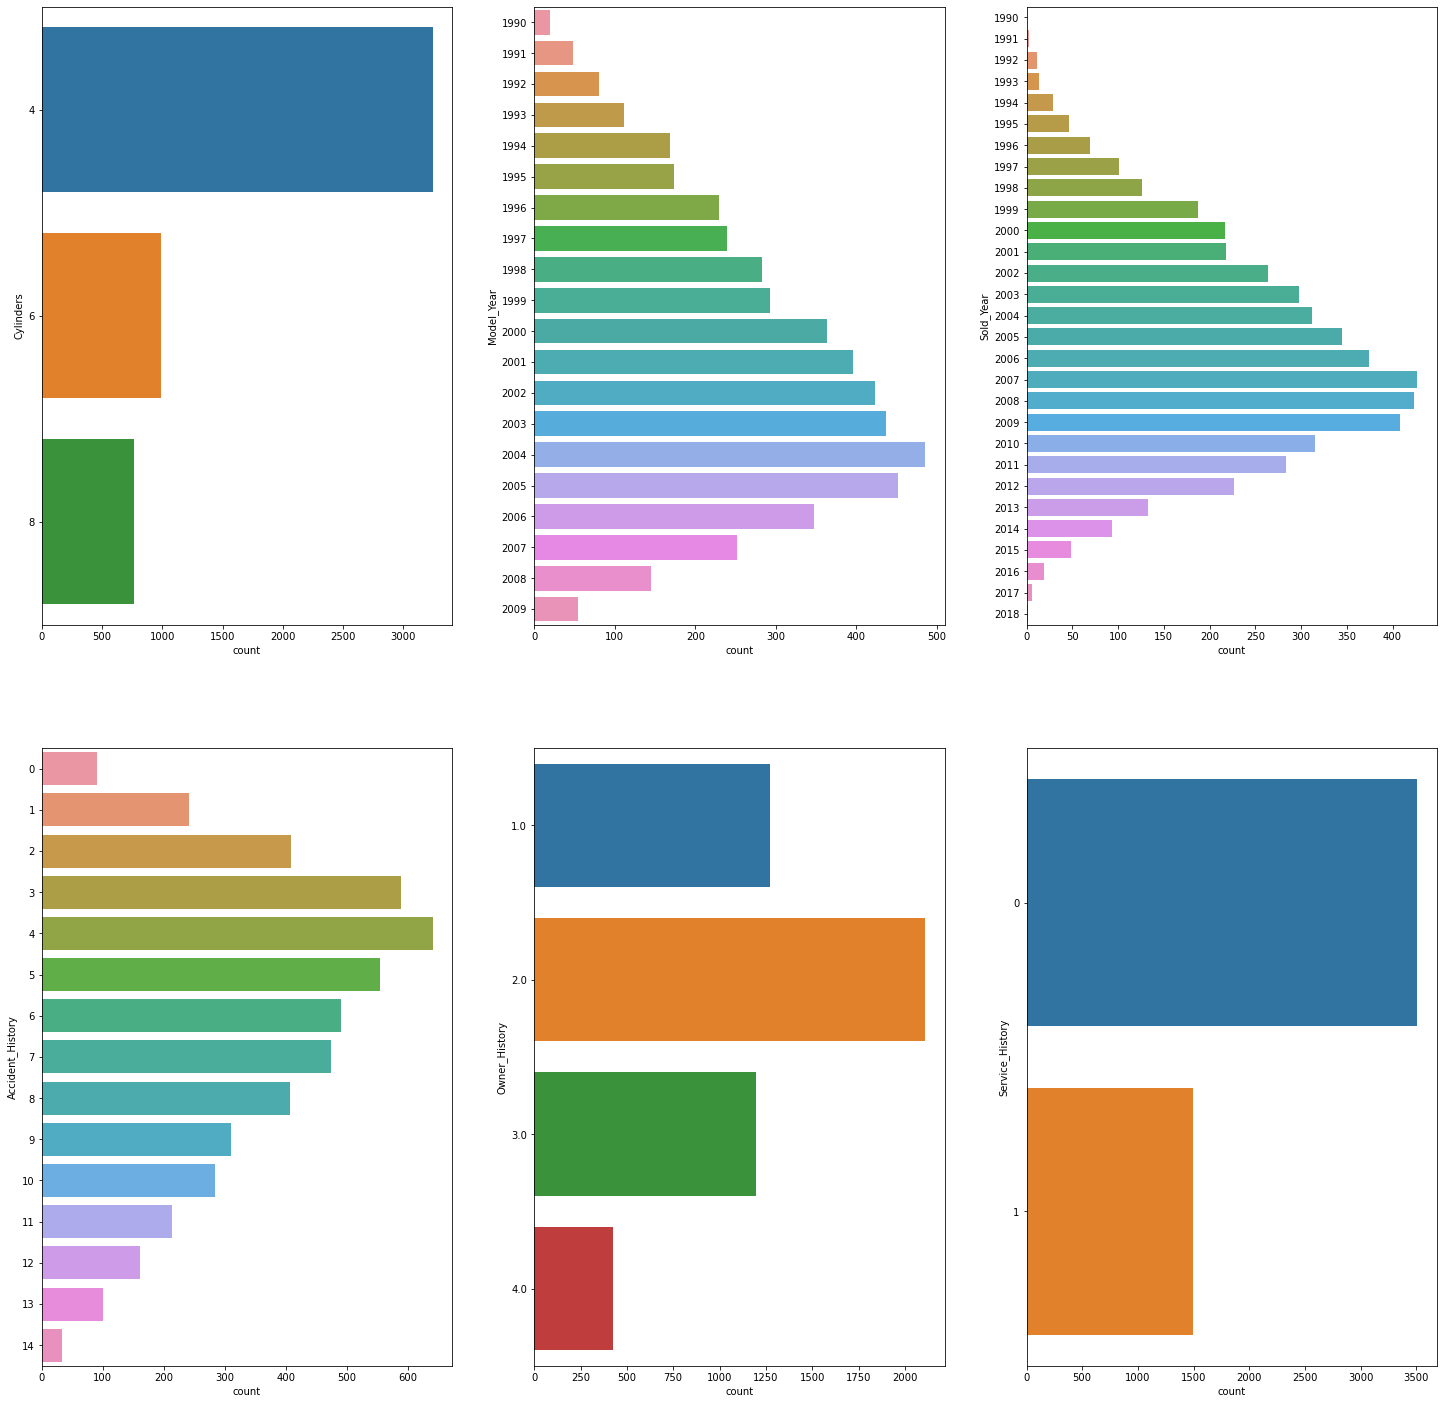


There are few main patterns, and they are:
 Power:2WD
 Class:Standard
 Seller_Type:Individual


In [5]:
## Data of 'Low' return cars!

df = pd.read_csv(r'Group_19_03_B.csv')
toInt = ['Sale_Price','Model_Price','KPL','Owner_History',]

for feature in toInt:
    df[feature] = df[feature].apply(lambda x: str(x).replace(',',''))
    df[feature] = df[feature].apply(lambda x: str(x).replace('SAR',''))   
    df[feature] = df[feature].apply(lambda x: str(x).replace('mpl',''))     
    df[feature] = df[feature].apply(lambda x: abs(float(x)))

df['depreciate'] = (df['Model_Price']-df['Sale_Price'])/((df['Sold_Year']-df['Model_Year'])*(df['Model_Price']))    
df["return(high|low)"] = df['depreciate'].apply(categorize)


print('Low return cars patterns')

dflow = df[df['return(high|low)'] == 'Low']

# Depicting the count of each categorical feature
cat_columns = dflow.select_dtypes(include='object').columns

nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=dflow,ax=axes.flatten()[ind])
plt.show()

# Depicting the categorical features with respect to 'Sale_Price' using Boxplots
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    axis=axes.flatten()[ind]
    sns.boxplot(y='Sale_Price',x=col,data=dflow,ax=axes.flatten()[ind])
    axis.set_xticklabels(axis.get_xticklabels(), rotation=80)
plt.show()

# Showing the linear relationship between numerical features and the output 
numerical_columns = df.select_dtypes(exclude='object').columns

nCols=3   # The number of columns that you want
nRows=len(numerical_columns)//nCols+1   # The number of correspomding rows 

fig, ax = plt.subplots(nCols, nRows, figsize=(25, 15))
plot = ax.flatten()
for i, c in enumerate(numerical_columns):
    sns.regplot(y="Sale_Price", x=c, scatter=False, fit_reg=True, data=df, ax=plot[i])

# countplot of some of the numrical features.
numerical_columns1 = ['Cylinders','Model_Year','Sold_Year','Accident_History','Owner_History','Service_History']

nCols=3   # The number of columns that you want
nRows=2   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(numerical_columns1):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()


print('\nThere are few main patterns, and they are:\n Power:2WD\n Class:Standard\n Seller_Type:Individual')

## Task-6

### In this task the aim is perform some visualization + Exploratory Analysis.

Low return cars patterns


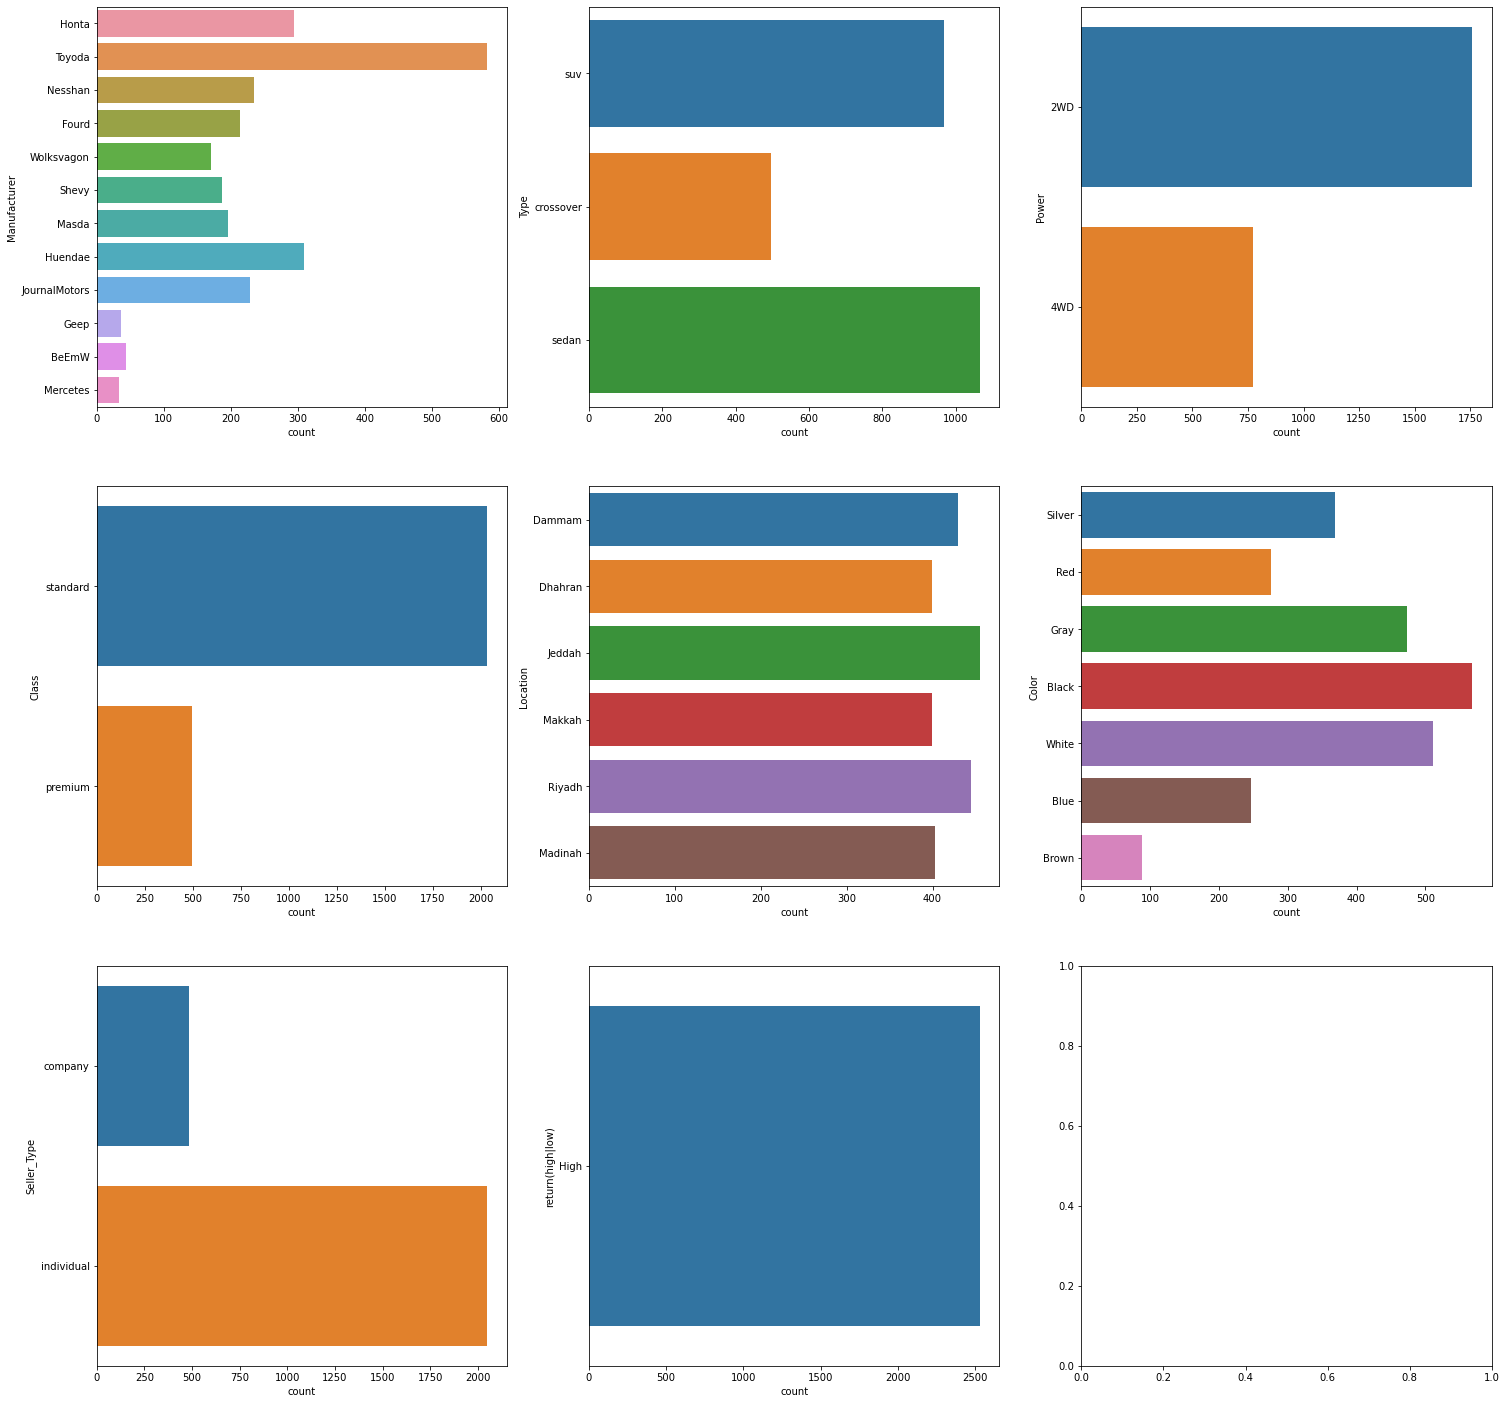

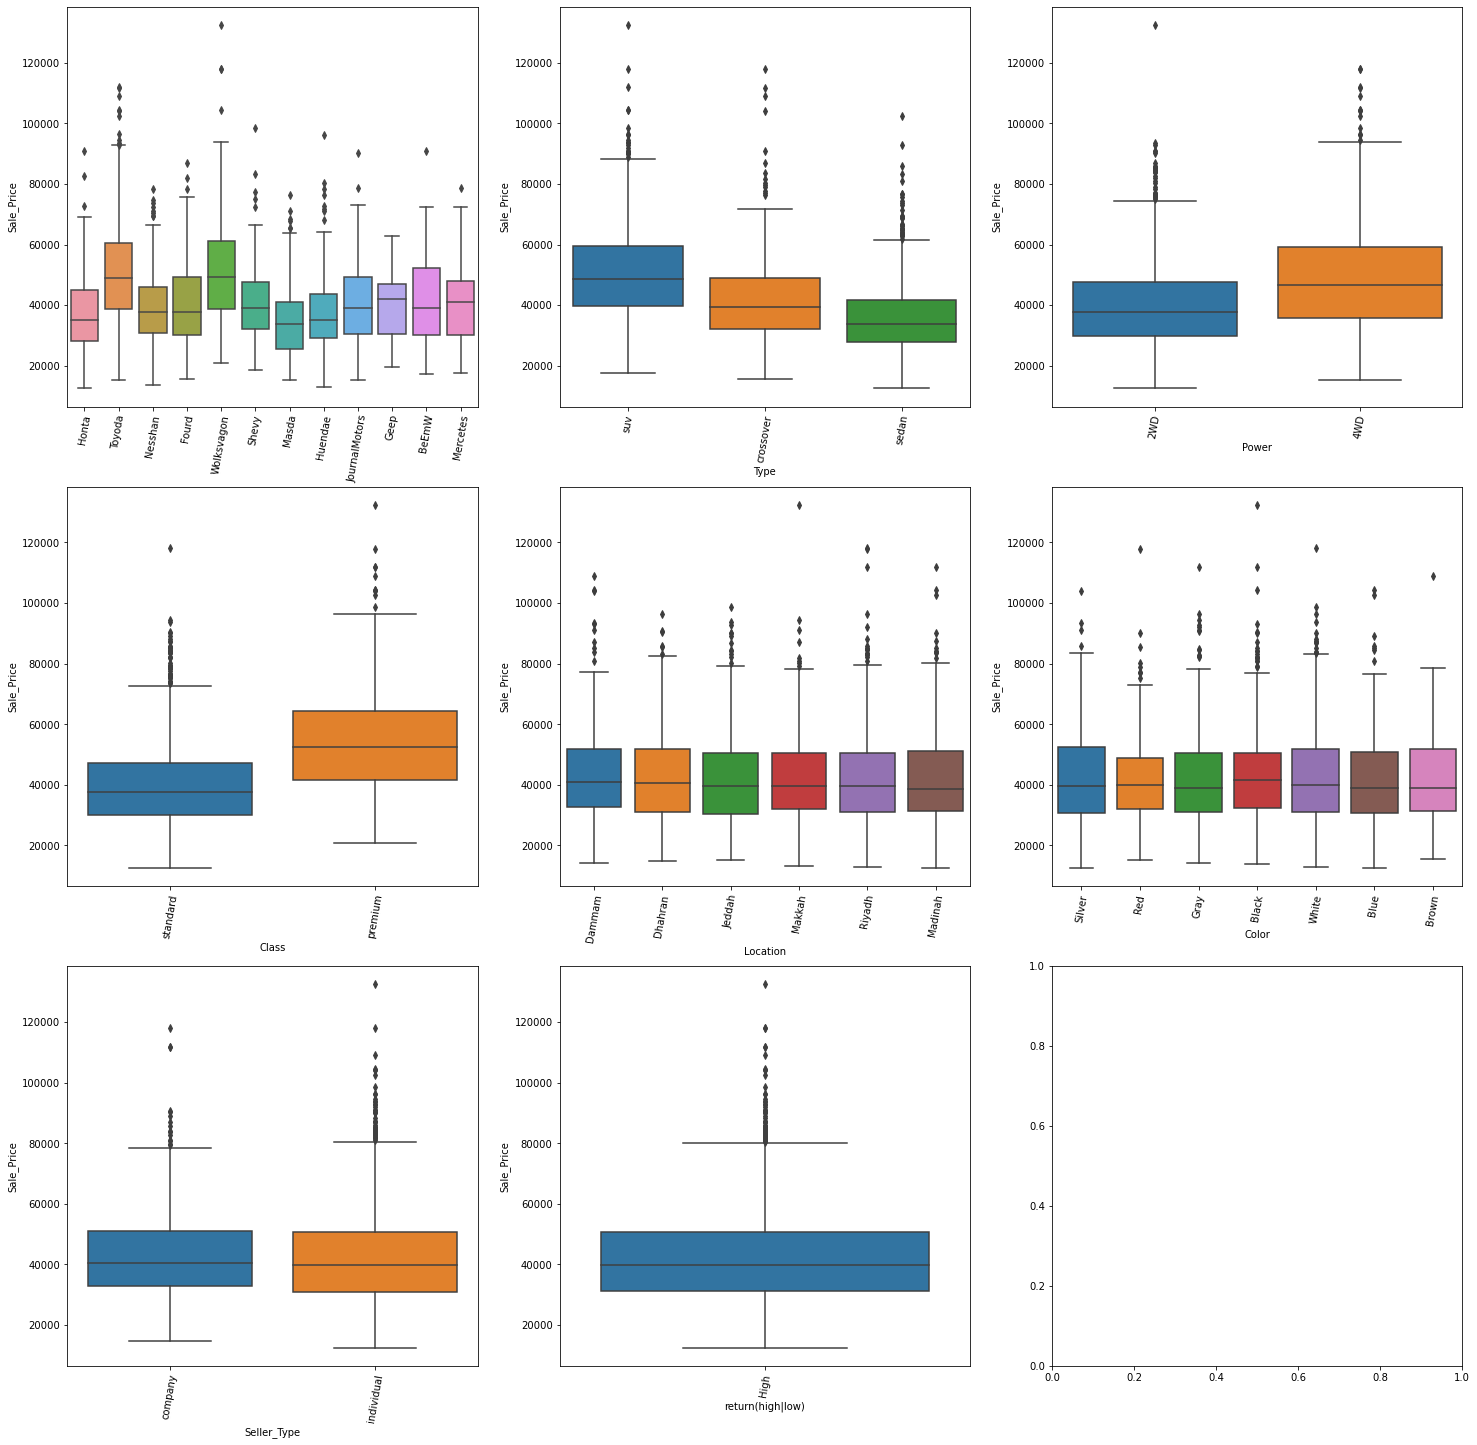

/Users/mohammedalsaif/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/mohammedalsaif/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


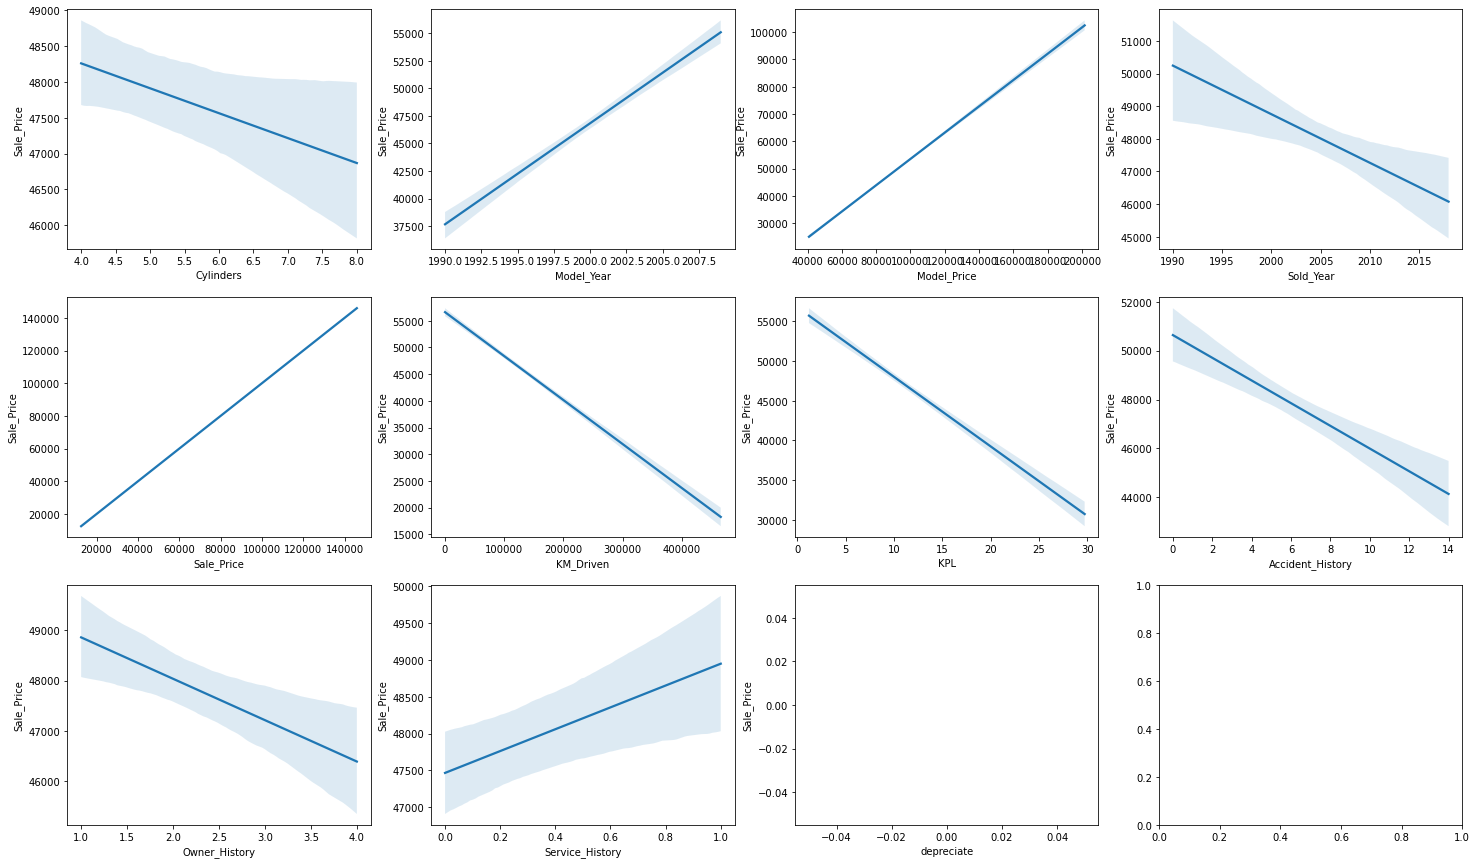

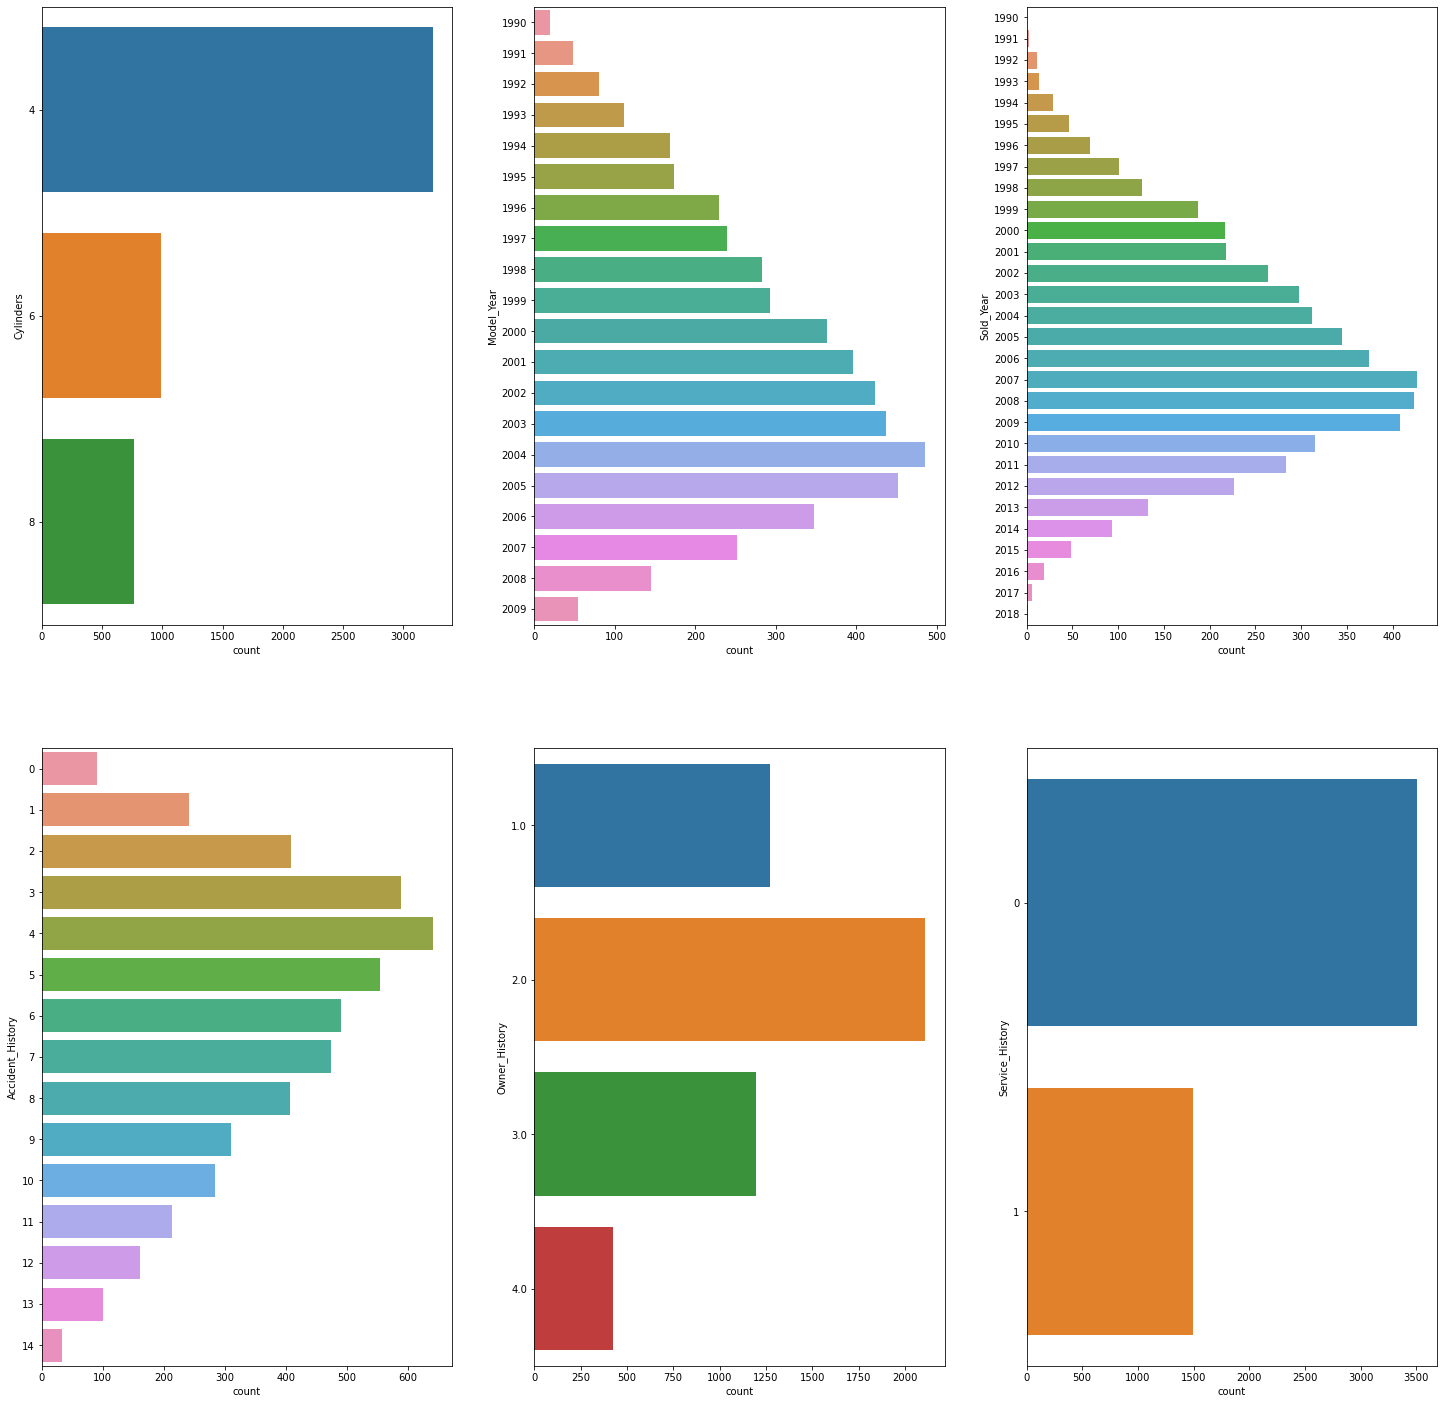


There are few main patterns, and they are:
 Power:2WD
 Class:Standard
 Seller_Type:Individual


In [6]:
## Data of 'High' return cars!

print('Low return cars patterns')

dflow = df[df['return(high|low)'] == 'High']

# Depicting the count of each categorical feature
cat_columns = dflow.select_dtypes(include='object').columns

nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=dflow,ax=axes.flatten()[ind])
plt.show()

# Depicting the categorical features with respect to 'Sale_Price' using Boxplots
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    axis=axes.flatten()[ind]
    sns.boxplot(y='Sale_Price',x=col,data=dflow,ax=axes.flatten()[ind])
    axis.set_xticklabels(axis.get_xticklabels(), rotation=80)
plt.show()

# Showing the linear relationship between numerical features and the output 
numerical_columns = df.select_dtypes(exclude='object').columns

nCols=3   # The number of columns that you want
nRows=len(numerical_columns)//nCols+1   # The number of correspomding rows 

fig, ax = plt.subplots(nCols, nRows, figsize=(25, 15))
plot = ax.flatten()
for i, c in enumerate(numerical_columns):
    sns.regplot(y="Sale_Price", x=c, scatter=False, fit_reg=True, data=df, ax=plot[i])

# countplot of some of the numrical features.
numerical_columns1 = ['Cylinders','Model_Year','Sold_Year','Accident_History','Owner_History','Service_History']

nCols=3   # The number of columns that you want
nRows=2   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(numerical_columns1):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()

print('\nThere are few main patterns, and they are:\n Power:2WD\n Class:Standard\n Seller_Type:Individual')

# The purpose of the next four tasks is performing Regression Analysis.

## Task-7

In [7]:
df = pd.read_csv(r'Group_19_03_B.csv')
toInt = ['Sale_Price','Model_Price','KPL','Owner_History',]

for feature in toInt:
    df[feature] = df[feature].apply(lambda x: str(x).replace(',',''))
    df[feature] = df[feature].apply(lambda x: str(x).replace('SAR',''))   
    df[feature] = df[feature].apply(lambda x: str(x).replace('mpl',''))     
    df[feature] = df[feature].apply(lambda x: abs(float(x)))
    
df['Service_History'] = df['Service_History'].apply(lambda x: str(x))




# Converting to Label Encoded column.
from sklearn.preprocessing import LabelEncoder
categ = ['Location','Color','Manufacturer','Class','Power']
encoder1 = LabelEncoder()
df[categ]=df[categ].apply(encoder1.fit_transform)


# Converting to One Hot Encoding column.
categ = ['Seller_Type', 'Service_History','Type']
df = pd.get_dummies(df, columns=categ,drop_first=False)


df['Sale_Price1'] = df['Sale_Price']
del df['Sale_Price']

# Generate Train - Test splits
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)



# Scaling the Train - Test splits
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]


# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1),'\n')
print('The coefficient estimates are:', reg1.coef_.tolist(),'\n')
print('The intercept estimates are:', reg1.intercept_)


coef = [round(x,3) for x in reg1.coef_.tolist()]
print('The Equation is:\n')
print('y = ('+str(coef[0])+'x'+str(1)+')',end="")
for i in range(len(coef)-1):
    print('+('+str(coef[i+1])+'x'+str(i+2)+')', end="")
print()
x = 0
df1 = df.iloc[:,:-1] 
for i in list(df1.columns):
    x = x+1
    print(i+':','x'+str(x))
    


The MSE using OLS is: 0.08154217923829586 

The coefficient estimates are: [0.10778133289083366, 0.012606965484859865, 1.1005202905318974, 0.6664233795209351, -1.1852102499041637, -0.06330514323035642, 0.10909370528784797, 0.05094183874529008, -0.0850081263318588, 0.003965621247066942, -0.0923365620017098, -0.020379339624060244, 0.003574979381257837, 0.0002469812150622027, -0.0002469812150640346, -0.02886149623560277, 0.028861496235602604, -0.006429041458419327, -0.057631698648571074, 0.06287683456510923] 

The intercept estimates are: 0.0
The Equation is:

y = (0.108x1)+(0.013x2)+(1.101x3)+(0.666x4)+(-1.185x5)+(-0.063x6)+(0.109x7)+(0.051x8)+(-0.085x9)+(0.004x10)+(-0.092x11)+(-0.02x12)+(0.004x13)+(0.0x14)+(-0.0x15)+(-0.029x16)+(0.029x17)+(-0.006x18)+(-0.058x19)+(0.063x20)
Manufacturer: x1
Cylinders: x2
Model_Year: x3
Model_Price: x4
Sold_Year: x5
KM_Driven: x6
KPL: x7
Power: x8
Class: x9
Location: x10
Accident_History: x11
Owner_History: x12
Color: x13
Seller_Type_company: x14
Seller_T

## Task-8

In [8]:
## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2),'\n')
print('The coefficient estimates are:', reg2.coef_.tolist(),'\n')
print('The intercept estimate is:', reg2.intercept_,'\n')

coef = [round(x,5) for x in reg2.coef_.tolist()]
print('The Equation is:\n')
print('y = ('+str(coef[0])+'x'+str(1)+')',end="")
for i in range(len(coef)-1):
    print('+('+str(coef[i+1])+'x'+str(i+2)+')', end="")
print()
print()
x = 0
df1 = df.iloc[:,:-1] 
for i in list(df1.columns):
    x = x+1
    print(i+':','x'+str(x))

The MSE using Ridge is: 0.08159695538567274 

The coefficient estimates are: [0.10777015605847781, 0.012519562305909686, 1.095831272427658, 0.6658529351020135, -1.1801672407288875, -0.06460497035830479, 0.10884743337633496, 0.05110609285020666, -0.08528233390551417, 0.00397516879541174, -0.0923315317204786, -0.020381390310307668, 0.0035413235175102463, 0.00025920216694984586, -0.000259202166945443, -0.028855775083813207, 0.028855775083828375, -0.006489221983894163, -0.05771900603513693, 0.0630134581916464] 

The intercept estimate is: 0.0 

The Equation is:

y = (0.10777x1)+(0.01252x2)+(1.09583x3)+(0.66585x4)+(-1.18017x5)+(-0.0646x6)+(0.10885x7)+(0.05111x8)+(-0.08528x9)+(0.00398x10)+(-0.09233x11)+(-0.02038x12)+(0.00354x13)+(0.00026x14)+(-0.00026x15)+(-0.02886x16)+(0.02886x17)+(-0.00649x18)+(-0.05772x19)+(0.06301x20)

Manufacturer: x1
Cylinders: x2
Model_Year: x3
Model_Price: x4
Sold_Year: x5
KM_Driven: x6
KPL: x7
Power: x8
Class: x9
Location: x10
Accident_History: x11
Owner_History: x1

## Task-9

In [9]:
## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3),'\n')
print('The coefficient estimates are:', reg3.coef_.tolist(),'\n')
print('The intercept estimate is:', reg3.intercept_,'\n')

coef = [round(x,5) for x in reg3.coef_.tolist()]
print('The Equation is:\n')
print('y = ('+str(coef[0])+'x'+str(1)+')',end="")
for i in range(len(coef)-1):
    print('+('+str(coef[i+1])+'x'+str(i+2)+')', end="")
print()
print()
x = 0
df1 = df.iloc[:,:-1] 
for i in list(df1.columns):
    x = x+1
    print(i+':','x'+str(x))

The MSE using Lasso is: 0.08179012891952904 

The coefficient estimates are: [0.10721451084562598, 0.011106413321718165, 1.08740144802179, 0.6667970245531616, -1.1718145094019616, -0.06561004151374117, 0.10732737784958049, 0.0499350689664543, -0.08390126120740815, 0.0029523082947370584, -0.09130739400935838, -0.019408954865202697, 0.002471510467826492, 0.0, -0.0, -0.05666141551496812, 3.956200446607052e-16, 0.0, -0.04856562247723978, 0.06978477002718982] 

The intercept estimate is: 0.0 

The Equation is:

y = (0.10721x1)+(0.01111x2)+(1.0874x3)+(0.6668x4)+(-1.17181x5)+(-0.06561x6)+(0.10733x7)+(0.04994x8)+(-0.0839x9)+(0.00295x10)+(-0.09131x11)+(-0.01941x12)+(0.00247x13)+(0.0x14)+(-0.0x15)+(-0.05666x16)+(0.0x17)+(0.0x18)+(-0.04857x19)+(0.06978x20)

Manufacturer: x1
Cylinders: x2
Model_Year: x3
Model_Price: x4
Sold_Year: x5
KM_Driven: x6
KPL: x7
Power: x8
Class: x9
Location: x10
Accident_History: x11
Owner_History: x12
Color: x13
Seller_Type_company: x14
Seller_Type_individual: x15
Servic

## Task-10

In [10]:
df = pd.read_csv(r'Group_19_03_C.csv')
toInt = ['Sale_Price','Model_Price','KPL','Owner_History',]

for feature in toInt:
    df[feature] = df[feature].apply(lambda x: str(x).replace(',',''))
    df[feature] = df[feature].apply(lambda x: str(x).replace('SAR',''))   
    df[feature] = df[feature].apply(lambda x: str(x).replace('mpl',''))     
    df[feature] = df[feature].apply(lambda x: abs(float(x)))
    
df['Service_History'] = df['Service_History'].apply(lambda x: str(x))




# Converting to Label Encoded column.
from sklearn.preprocessing import LabelEncoder
categ = ['Location','Color','Manufacturer','Class','Power']
encoder1 = LabelEncoder()
df[categ]=df[categ].apply(encoder1.fit_transform)


# Converting to One Hot Encoding column.
categ = ['Seller_Type', 'Service_History','Type']
df = pd.get_dummies(df, columns=categ,drop_first=False)


df['Sale_Price1'] = df['Sale_Price']
del df['Sale_Price']

# Generate Train - Test splits
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)



# Scaling the Train - Test splits
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]


# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1),'\n')


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2),'\n')

## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3),'\n')


print('The predicted normalized values for Sale_Price using Ridge analysis\n',y_pred2)

The MSE using OLS is: 0.10697215565628701 

The MSE using Ridge is: 0.10690661151455028 

The MSE using Lasso is: 0.10691120274793794 

The predicted normalized values for Sale_Price using Ridge analysis
 [ 0.01006687  0.00785569 -1.0961736  -0.10903252 -0.07425595  0.40273154
 -0.95642066  1.02537617 -0.51068043  0.19570895  2.47336963  0.62927659
 -1.33929676 -0.21323064 -0.61446347  2.14776403 -0.13342743  0.97432113
 -1.29123849  0.41377953  1.05662082 -0.8693461  -0.88449481  0.51672602
  0.20209335 -0.23749916  0.24256186 -0.82374561 -0.81896487  0.76814137
  0.49194469  0.55723155 -1.05102153  1.67650161 -0.78869118 -1.10279112
  0.89432204 -0.97767546  1.1525717  -0.23633092  0.8102445   0.60578438
 -0.70355512 -0.19878841 -1.24615656 -0.8863085  -1.50922048 -0.26509038
 -1.19929402  0.10380571 -0.93018259 -0.98584707  1.62595424 -0.71350089
  0.31031658 -0.83621914  0.11451535  0.06868291  1.92908434  0.95090549
 -0.02630674  0.15342128 -1.27062696 -0.83827303  0.64271137  0.4

## References